In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cartopy.crs as ccrs

In [2]:
path = "G:\\Isaac\\Documents\\msc-research\\data\\ERA5\\daily_data\\correlations\\"
mean_file = "mean_SOI_rank_correlations.nc"
var_file = "variance_SOI_rank_correlations.nc"

In [3]:
mean_corr_ds = xr.open_dataset(path + mean_file)
var_corr_ds = xr.open_dataset(path + var_file)

TypeError: Length of x (360) must match number of columns in z (71)

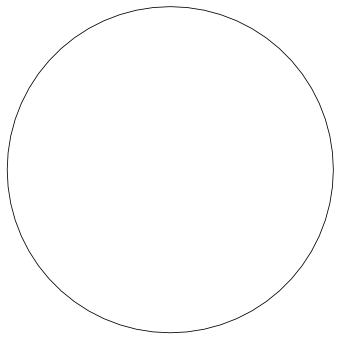

In [4]:
mean_max = mean_corr_ds.SOI.max()
mean_min = mean_corr_ds.SOI.min()
var_max = var_corr_ds.SOI.max()
var_min = var_corr_ds.SOI.min()

fig = plt.figure(figsize=(15,6))

ax1 = plt.subplot(1, 2, 1, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0))
ax1.contourf(mean_corr_ds.lon, mean_corr_ds.lat, mean_corr_ds.SOI.transpose(), 60,
             transform=ccrs.PlateCarree(), cmap=cm.seismic)
ax1.coastlines()
ax1.set_title("Mean Height Anomalies")

sm1 = plt.cm.ScalarMappable(cmap=cm.seismic, norm=plt.Normalize(vmin=mean_min, vmax=mean_max))
sm1._A = []
plt.colorbar(sm1, ax=ax1, ticks=[0.1, 0.05, 0, -0.05, -0.1])

ax2 = plt.subplot(1, 2, 2, projection=ccrs.Orthographic(central_longitude=0.0, central_latitude=-90.0))
ax2.contourf(var_corr_ds.lon, var_corr_ds.lat, var_corr_ds.SOI.transpose(), 60,
             transform=ccrs.PlateCarree(), cmap=cm.seismic)
ax2.coastlines()
ax2.set_title("Variance Anomalies")

sm2 = plt.cm.ScalarMappable(cmap=cm.seismic, norm=plt.Normalize(vmin=var_min, vmax=var_max))
sm2._A = []
plt.colorbar(sm2, ax=ax2, ticks=[0.4, 0.3, 0.2, 0.1, 0, -0.1, -0.2, -0.3, -0.4])

fig.suptitle("Rank Correlations between SOI and 2-8 Day Bandpassed 500hPa Geopotential Height Field", fontsize=16)

plt.show()